In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df= pd.read_csv("Telco-Customer-Churn.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
#column total charges listed as object , we will convert it to float64. We will also removes the rows where at least one element is missing 
df['TotalCharges'] =pd.to_numeric(df["TotalCharges"], errors='coerce')
df_clean= df.dropna()

df_clean.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
#Overall churn within last month. 
print("Overall churn rate withing last week")
total_churn = round((df_clean['Churn'].value_counts()/sum(df_clean['Churn'].value_counts())*100),2)
print(total_churn)

print("\n")
print("Churn rate by gender withing last week")
churn_gender= df_clean.groupby('gender')['Churn'].value_counts()
print(churn_gender)


Overall churn rate withing last week
No     73.42
Yes    26.58
Name: Churn, dtype: float64


Churn rate by gender withing last week
gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64


In [15]:
#Overall churn rate within last month is 26.58%, with almost same number of male and female

Churn rate for family size =1
No     2157
Yes    1123
Name: Churn, dtype: int64
No     65.76
Yes    34.24
Name: Churn, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


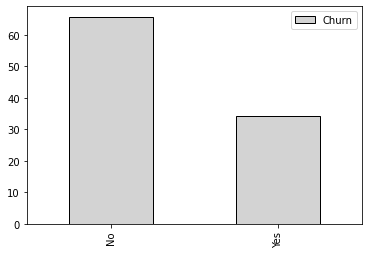



Churn rate for family size >1
No     3006
Yes     746
Name: Churn, dtype: int64
No     80.12
Yes    19.88
Name: Churn, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


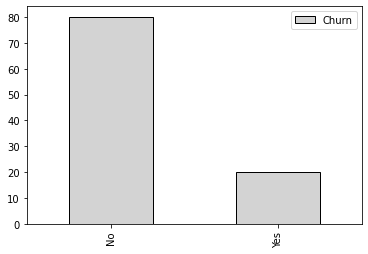

In [50]:
# From filtered data, let's look at the churn rate based on family size.
print("Churn rate for family size =1")
# Family size= 1
df_fam_one = df_clean[(df_clean['Partner']=='No') &(df_clean['Dependents']=='No')]
print(df_fam_one['Churn'].value_counts())
print(round(((df_fam_one['Churn'].value_counts()) /sum(df_fam_one['Churn'].value_counts()))*100,2))
print(round(((df_fam_one['Churn'].value_counts()) /sum(df_fam_one['Churn'].value_counts()))*100,2).plot(kind='bar',fc='lightgrey', ec='black'))
plt.legend()
plt.show()
print("\n")

print("Churn rate for family size >1")
#Family size >1
df_fam_multiple = df_clean[(df_clean['Partner']=='Yes') | (df_clean['Dependents']=='Yes')]
print(df_fam_multiple['Churn'].value_counts())
print(round(((df_fam_multiple['Churn'].value_counts()) /sum(df_fam_multiple['Churn'].value_counts()))*100,2))
print(round(((df_fam_multiple['Churn'].value_counts()) /sum(df_fam_multiple['Churn'].value_counts()))*100,2).plot(kind='bar',fc='lightgrey',ec='black'))
plt.legend()
plt.show()

In [52]:
# Phone users among single peopel and churn rate 
PhoneServicesingle =df_fam_one[(df_fam_one['PhoneService']=='Yes') & (df_fam_one['InternetService']=='No')]
print("Phone users among single people :")
print(PhoneServicesingle['PhoneService'].value_counts())

print(PhoneServicesingle['Churn'].value_counts())
print(round((PhoneServicesingle['Churn'].value_counts()/ sum(PhoneServicesingle['Churn'].value_counts()))*100,2))

Phone users among single people :
Yes    671
Name: PhoneService, dtype: int64
No     595
Yes     76
Name: Churn, dtype: int64
No     88.67
Yes    11.33
Name: Churn, dtype: float64


In [53]:
df_fam_one['InternetService'] = df['InternetService'].replace({'Fiber optic':'Yes', 'DSL':'Yes'})
InternetServiceSingle = df_fam_one[(df_fam_one['InternetService']=='Yes') & (df_fam_one['PhoneService']=='No')]
print("Interenet users among single people and churn rate:")
print(InternetServiceSingle['InternetService'].value_counts())
print(InternetServiceSingle['Churn'].value_counts())
print(round((InternetServiceSingle['Churn'].value_counts()/ sum(InternetServiceSingle['Churn'].value_counts()))*100,2))


Interenet users among single people and churn rate:
Yes    327
Name: InternetService, dtype: int64
No     224
Yes    103
Name: Churn, dtype: int64
No     68.5
Yes    31.5
Name: Churn, dtype: float64


<ipython-input-53-bf1825178aaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fam_one['InternetService'] = df['InternetService'].replace({'Fiber optic':'Yes', 'DSL':'Yes'})


In [24]:
# Among single people,  Churn rate is higher for the people with internet service 

In [55]:
# we will also look at the people with fam >1 and see if similar trend apprers 
PhoneServicemultiple =df_fam_multiple[(df_fam_multiple['PhoneService']=='Yes') & (df_fam_multiple['InternetService']=='No')]
print("Phone users :")
print(PhoneServicemultiple['PhoneService'].value_counts())

print(PhoneServicemultiple['Churn'].value_counts())
print(round((PhoneServicemultiple['Churn'].value_counts()/ sum(PhoneServicemultiple['Churn'].value_counts()))*100,2))

Phone users :
Yes    849
Name: PhoneService, dtype: int64
No     812
Yes     37
Name: Churn, dtype: int64
No     95.64
Yes     4.36
Name: Churn, dtype: float64


In [57]:
df_fam_multiple['InternetService'] = df_clean['InternetService'].replace({'Fiber optic':'Yes', 'DSL':'Yes'})
InternetServiceMultiple = df_fam_multiple[(df_fam_multiple['InternetService']=='Yes') & (df_fam_multiple['PhoneService']=='No')]
print("Interenet users :")
print(InternetServiceMultiple['InternetService'].value_counts())
print(InternetServiceMultiple['Churn'].value_counts())
print(round((InternetServiceMultiple['Churn'].value_counts()/ sum(InternetServiceMultiple['Churn'].value_counts()))*100,2))
#InternetService =df_fam_multiple[(df_fam_multiple['PhoneService']=='No') & (df_fam_multiple['InternetService']=='Yes')]

Interenet users :
Yes    353
Name: InternetService, dtype: int64
No     286
Yes     67
Name: Churn, dtype: int64
No     81.02
Yes    18.98
Name: Churn, dtype: float64


<ipython-input-57-0d5bc530d491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fam_multiple['InternetService'] = df_clean['InternetService'].replace({'Fiber optic':'Yes', 'DSL':'Yes'})


In [ ]:
#for fam >1, churn rate is higher among internet users 

In [59]:
#Single
#internet amenities no 
print("Single people, internet users, no amenities")
int_amnty_7 = InternetServiceSingle['DeviceProtection']=='No'
int_amnty_8 = InternetServiceSingle['OnlineSecurity']=='No'
int_amnty_9 = InternetServiceSingle['OnlineBackup']=='No'
int_amnty_10 = InternetServiceSingle['TechSupport']=='No'
int_amnty_11 = InternetServiceSingle['StreamingTV']=='No'
int_amnty_12 = InternetServiceSingle['StreamingMovies']=='No'
#only internet service  single people 
InternetServiceOnlySingle= InternetServiceSingle[int_amnty_7 &int_amnty_8 & int_amnty_9 & int_amnty_10 &int_amnty_11&int_amnty_12]
print(round((InternetServiceOnlySingle['Churn'].value_counts()/sum(InternetServiceOnlySingle['Churn'].value_counts()))*100,2))

Single people, internet users, no amenities
No     53.85
Yes    46.15
Name: Churn, dtype: float64


In [62]:
# fam >1
#internet amenities no
print("People with partner/dependent with internet, no amenities ")
int_amnty_13 = InternetServiceMultiple['DeviceProtection']=='No'
int_amnty_14 = InternetServiceMultiple['OnlineSecurity']=='No'
int_amnty_15 = InternetServiceMultiple['OnlineBackup']=='No'
int_amnty_16 = InternetServiceMultiple['TechSupport']=='No'
int_amnty_17 = InternetServiceMultiple['StreamingTV']=='No'
int_amnty_18 = InternetServiceMultiple['StreamingMovies']=='No'
InternetServiceOnlypartner= InternetServiceMultiple[int_amnty_13 &int_amnty_14 & int_amnty_15 & int_amnty_16 &int_amnty_17&int_amnty_18]
print(InternetServiceOnlypartner['Churn'].value_counts())
print(round((InternetServiceOnlypartner['Churn'].value_counts()/sum(InternetServiceOnlypartner['Churn'].value_counts())*100),2))

People with partner/dependent with internet, no amenities 
No     17
Yes    11
Name: Churn, dtype: int64
No     60.71
Yes    39.29
Name: Churn, dtype: float64


In [63]:
#single 
#Internet + at least one amenity single people
#internet amenities yes
int_amnty_1 = InternetServiceSingle['DeviceProtection']=='Yes'
int_amnty_2 = InternetServiceSingle['OnlineSecurity']=='Yes'
int_amnty_3 = InternetServiceSingle['OnlineBackup']=='Yes'
int_amnty_4 = InternetServiceSingle['TechSupport']=='Yes'
int_amnty_5 = InternetServiceSingle['StreamingTV']=='Yes'
int_amnty_6 = InternetServiceSingle['StreamingMovies']=='Yes'

InternetServiceAmenitySingle= InternetServiceSingle[int_amnty_1 | int_amnty_2 | int_amnty_3 | int_amnty_4 | int_amnty_5 | int_amnty_6]
print(round((InternetServiceAmenitySingle['Churn'].value_counts()/sum(InternetServiceAmenitySingle['Churn'].value_counts())*100),2))

No     71.27
Yes    28.73
Name: Churn, dtype: float64


In [64]:
#fam >1
#Internet + at least one amenity fam >1
#internet amenities yes
int_amnty_19 = InternetServiceMultiple['DeviceProtection']=='Yes'
int_amnty_20 = InternetServiceMultiple['OnlineSecurity']=='Yes'
int_amnty_21 = InternetServiceMultiple['OnlineBackup']=='Yes'
int_amnty_22 = InternetServiceMultiple['TechSupport']=='Yes'
int_amnty_23 = InternetServiceMultiple['StreamingTV']=='Yes'
int_amnty_24 = InternetServiceMultiple['StreamingMovies']=='Yes'

InternetServiceAmenitypartner= InternetServiceMultiple[int_amnty_19 | int_amnty_20 | int_amnty_21 | int_amnty_22 | int_amnty_23 | int_amnty_24]
print(round((InternetServiceAmenitypartner['Churn'].value_counts()/sum(InternetServiceAmenitypartner['Churn'].value_counts())*100),2))

No     82.77
Yes    17.23
Name: Churn, dtype: float64


In [39]:
#churn rate is higher among single people with no internet amenities 
InternetServiceOnlySingle.groupby(['Churn','Contract','PaymentMethod']).mean()[['MonthlyCharges','TotalCharges']]

MonthlyCharges  TotalCharges
Churn Contract       PaymentMethod                                          
No    Month-to-month Bank transfer (automatic)       25.130000    373.620000
                     Credit card (automatic)         25.037500    281.187500
                     Electronic check                24.725000    196.433333
                     Mailed check                    24.820000    136.995000
      One year       Credit card (automatic)         24.350000    150.850000
                     Mailed check                    25.350000    406.950000
Yes   Month-to-month Bank transfer (automatic)       25.000000     63.650000
                     Credit card (automatic)         25.100000    712.850000
                     Electronic check                24.815385     64.519231
                     Mailed check                    25.000000     36.856250

In [ ]:
#churn rate is higher among  fam>1 with no internet amenities 

In [46]:
InternetServiceOnlySingle.groupby(['Churn','Contract','PaymentMethod']).mean()[['MonthlyCharges','TotalCharges']]

MonthlyCharges  TotalCharges
Churn Contract       PaymentMethod                                          
No    Month-to-month Bank transfer (automatic)       25.130000    373.620000
                     Credit card (automatic)         25.037500    281.187500
                     Electronic check                24.725000    196.433333
                     Mailed check                    24.820000    136.995000
      One year       Credit card (automatic)         24.350000    150.850000
                     Mailed check                    25.350000    406.950000
Yes   Month-to-month Bank transfer (automatic)       25.000000     63.650000
                     Credit card (automatic)         25.100000    712.850000
                     Electronic check                24.815385     64.519231
                     Mailed check                    25.000000     36.856250

In [47]:
df_clean.groupby(['Churn','Contract','PaymentMethod']).mean()[['MonthlyCharges','TotalCharges']]

MonthlyCharges  TotalCharges
Churn Contract       PaymentMethod                                          
No    Month-to-month Bank transfer (automatic)       65.823067   2049.132345
                     Credit card (automatic)         64.149178   1885.440411
                     Electronic check                71.746437   1768.714486
                     Mailed check                    42.681342    624.239853
      One year       Bank transfer (automatic)       65.889943   3235.082861
                     Credit card (automatic)         65.849720   3227.901261
                     Electronic check                76.393110   3700.161837
                     Mailed check                    42.465495   1439.525559
      Two year       Bank transfer (automatic)       63.979006   4098.748711
                     Credit card (automatic)         64.032451   4031.370459
                     Electronic check                84.013226   5265.557742
                     Mailed check                    38.536559   1868.094624
Yes   Month-to-month Bank transfer (automatic)       75.382836   1575.348010
                     Credit card (automatic)         74.916573   1642.755337
                     Electronic check                77.782294   1215.229577
                     Mailed check                    53.348936    390.739894
      One year       Bank transfer (automatic)       82.293421   4036.877632
                     Credit card (automatic)         86.454878   4483.595122
                     Electronic check                91.043750   4530.310937
                     Mailed check                    70.428261   2079.241304
      Two year       Bank transfer (automatic)       95.410526   6082.392105
                     Credit card (automatic)         82.061538   5309.380769
                     Electronic check                88.180769   5361.407692
                     Mailed check                    46.450000   2155.916667

In [48]:
# both for fam =1 and fam >1 , we see a similar trend in churn rate. When comparing contract and payment type, People(fam=1 and fam >1) with only internet serive who churned has no one year or two-year contract. Looking at the prices,people with one year or two year contract almost same as month-to-month contract , sometimes even more. 
# As a part of customemr retention program, they sould focus on pricing and insentive for long term contract. That will attract more peopel in long term contract hencce reduce customer churn.